# Bibliotheken und Bilddarstellung

In [1]:
import cv2
from matplotlib import pyplot as plt
import math
import numpy as np

## Lineare Punktoperationen

Das Laden eines Bildes als Grauwertbild erfolgt durch 

In [2]:
def show_image_and_histogram( image, histogram, output_filename = None):
    fig, ax = plt.subplots(1, 2, figsize=(16,4))
    
    ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    ax[1].bar(list(range(256)), histogram.reshape(-1), width=1, edgecolor='k')
    if not output_filename is None:
        plt.savefig(output_filename, dpi = 300, bbox_inches='tight')
    plt.show()

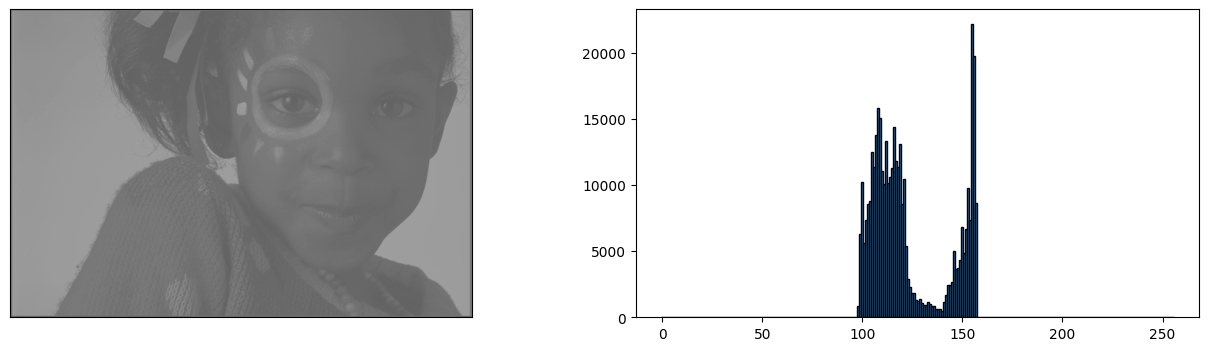

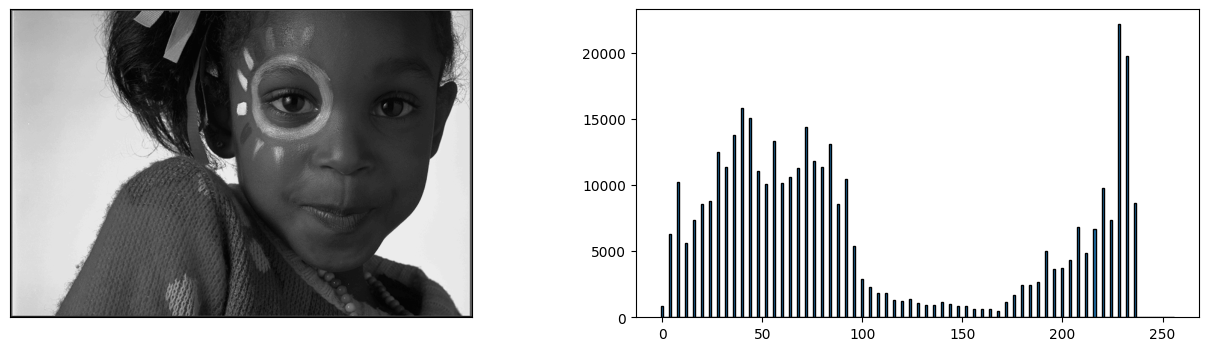

In [3]:
image = cv2.imread('images/kodim15_gray_low_contrast.png', cv2.IMREAD_GRAYSCALE)

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram)

image[:,:] = (image[:,:]-98)*4

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram, "kodim15_gray_low_contrast_corrected.png")

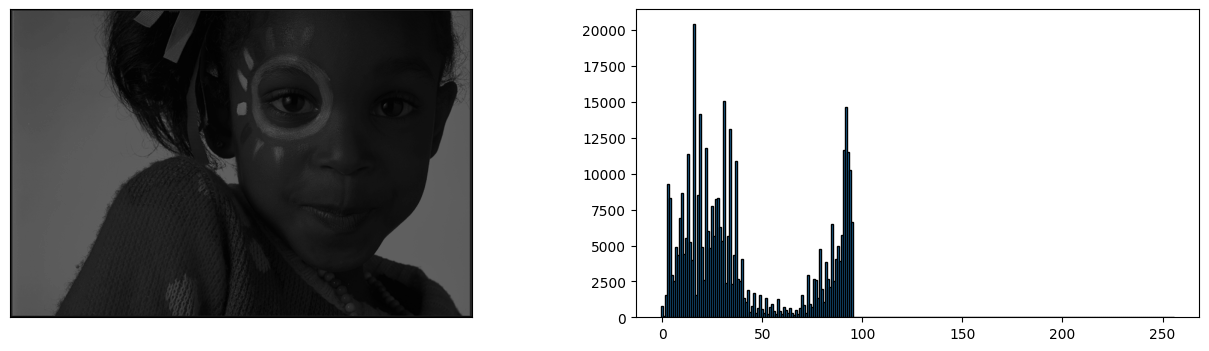

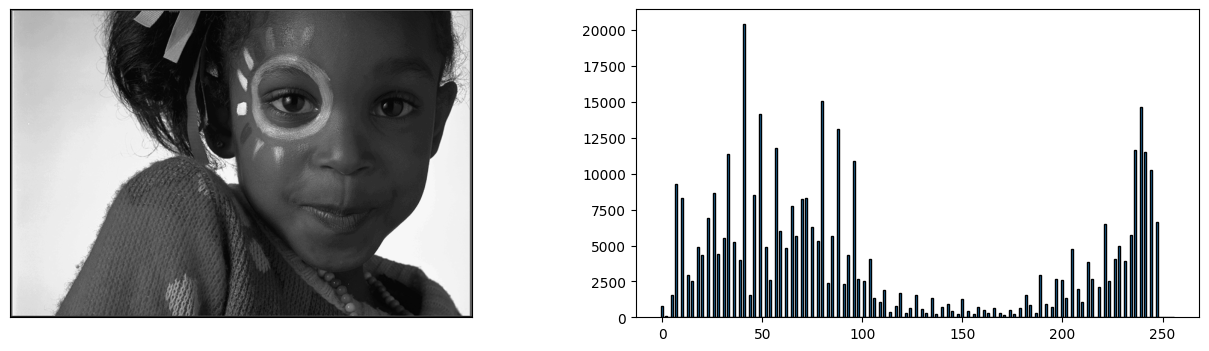

In [14]:
image = cv2.imread('images/kodim15_gray_unterbelichtet.png', cv2.IMREAD_GRAYSCALE)

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram)


image[:,:] = image[:,:]*2.6

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram, "kodim15_gray_unterbelichtet_corrected.png")

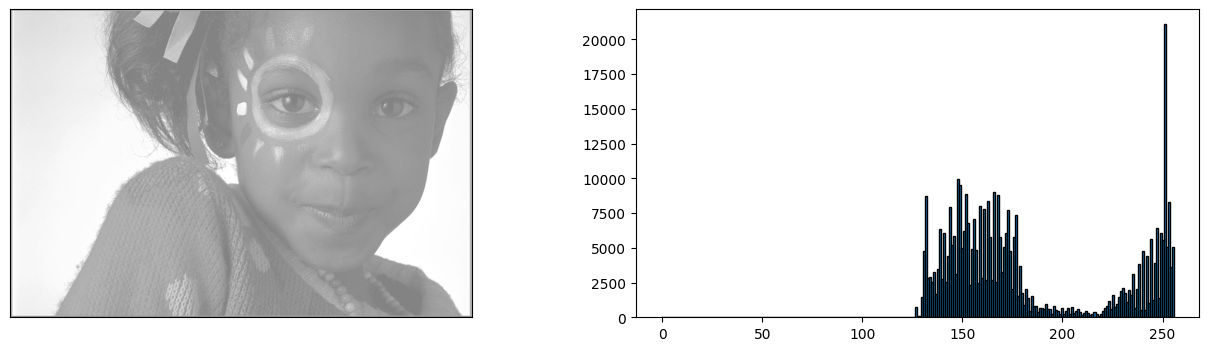

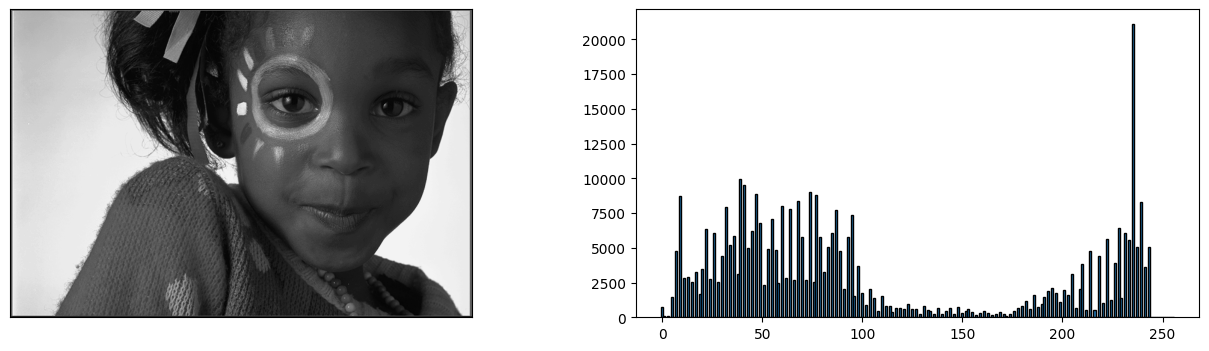

In [4]:
image = cv2.imread('images/kodim15_gray_ueberbelichtet.png', cv2.IMREAD_GRAYSCALE)

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram)

image[:,:] = (image[:,:] - 127) *1.9

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram, "kodim15_gray_ueberbelichtet_corrected.png")

## Non-Linear Pixel Operation 

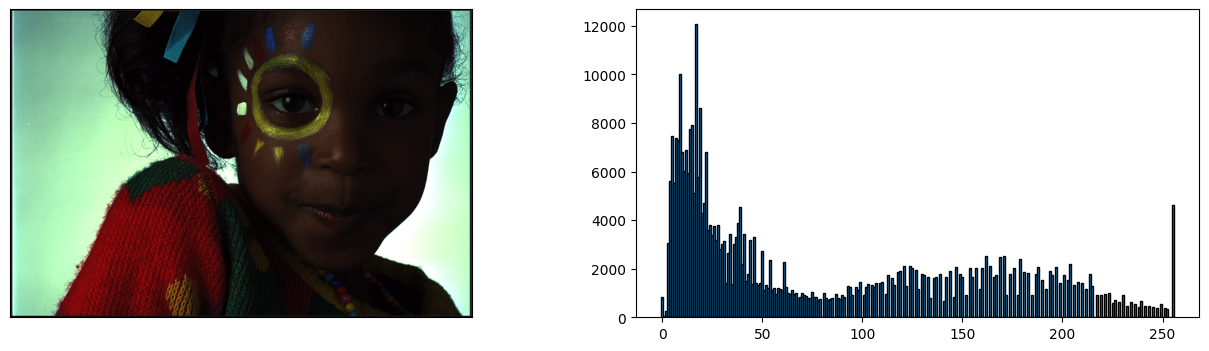

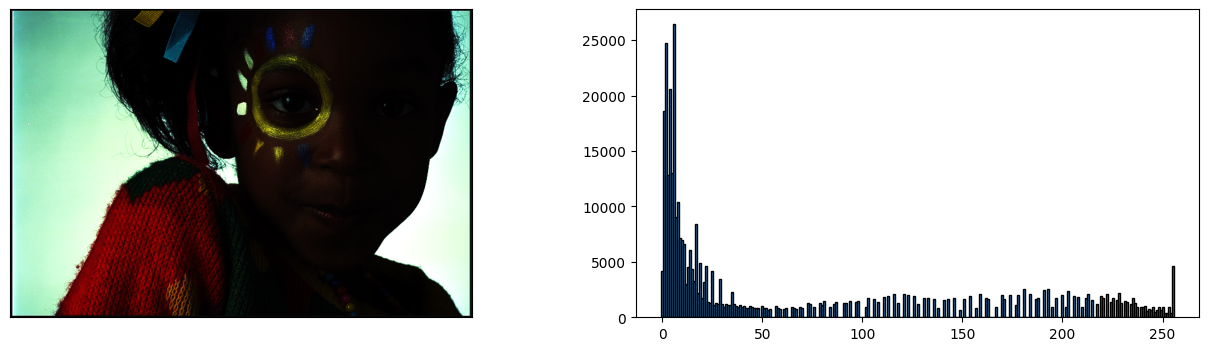

In [40]:
image = cv2.imread('images/kodim15_unterbelichtet.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram)

image2 = image[:,:,:]/255*6-3
value1 = (math.e**-3/(1+math.e**-3))
value2 = 255/((math.e**3/(1+math.e**3))-value1)

image2[:,:,:] = ((math.e**image2[:,:,:]/(1+math.e**image2[:,:,:]))-value1)*value2
image = image2.astype('uint8')

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram, "kodim15_exp_corrected_1.png")

## Non-Linear Pixel Operation with parametrized Function

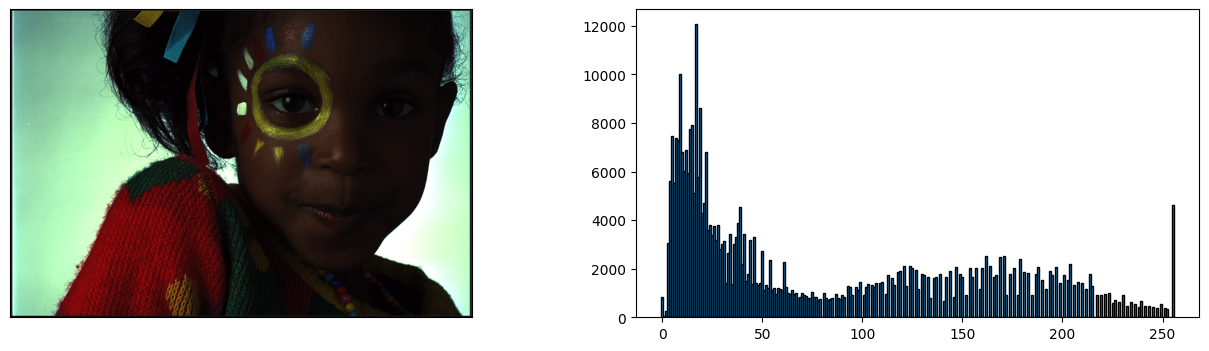

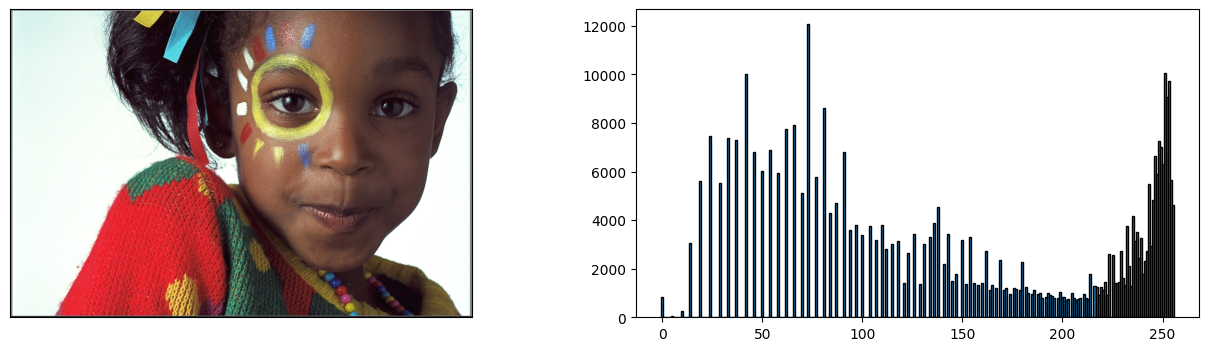

In [24]:
image = cv2.imread('images/kodim15_unterbelichtet.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram)

image[:,:,:] = 255/(math.e**-(0.01*255)-1)*(math.e**(-0.01*image[:,:,:])-1)

histogram = cv2.calcHist([image], [0], None, [256], [0,256])
show_image_and_histogram(image, histogram, "kodim15_exp_corrected_2.png")

## Histogram Egalisation

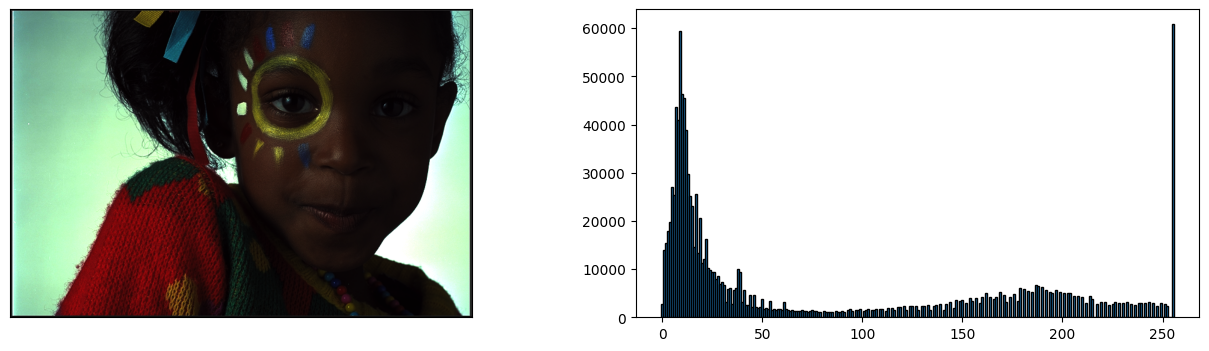

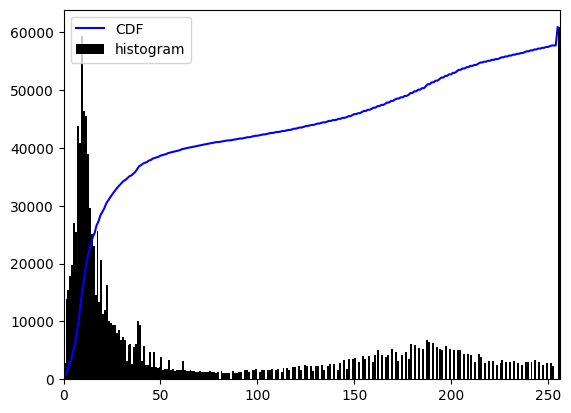

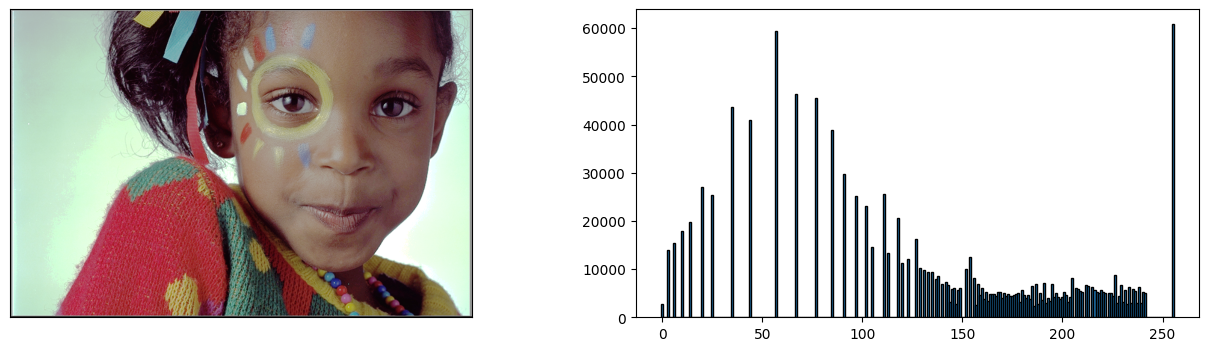

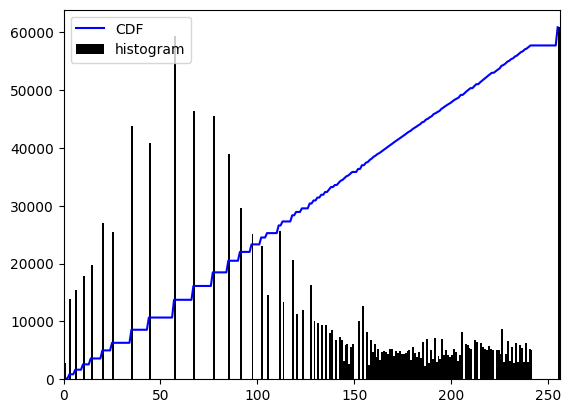

In [61]:
image = cv2.imread('images/kodim15_unterbelichtet.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

histogram = cv2.calcHist([image.flatten()], [0], None, [256], [0,256])

show_image_and_histogram(image, histogram)
 
cdf = histogram.cumsum() #Get the cumulative/continuous values
cdf_normalized = cdf * float(histogram.max()) / cdf.max() #Calculate the normalized graph
#Plot current histogram and graph
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'k')
plt.xlim([0,256])
plt.legend(('CDF','histogram'), loc = 'upper left')
plt.show()


#Calculate the discrete values; cdf - cd.min guarantees we start at 0; 255 = G - 1 ; cd.max() - cdf.min() = MN
cdf = (cdf - cdf.min())*255/(cdf.max()-cdf.min())
#Convert the discrete values to uint8 color values
cdf = cdf.astype('uint8')
#use the table to transform the picture
image2 = cdf[image]

histogram2 = cv2.calcHist([image2.flatten()], [0], None, [256], [0,256])

show_image_and_histogram(image2, histogram2, "kodim15_histogram_corrected.png")

cdf2 = histogram2.cumsum()
cdf_normalized2 = cdf2 * float(histogram2.max()) / cdf2.max()
plt.plot(cdf_normalized2, color = 'b')
plt.hist(image2.flatten(),256,[0,256], color = 'k')
plt.xlim([0,256])
plt.legend(('CDF','histogram'), loc = 'upper left')
plt.show()